# 데이터 전처리

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_csv(r"C:\Users\Administrator\Desktop\train.csv")

## 데이터 EDA

### 결측치 판단 함수

In [5]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
def check_missing_per_row(df):
    """
    행별로 결측치 개수를 확인하는 함수
    :param df: 입력 데이터프레임
    :return: 행별 결측치 개수와 비율을 포함한 데이터프레임
    """
    # 각 행별 결측치 개수 계산
    missing_count = df.isnull().sum(axis=1)

    # 각 행별 결측치 비율 계산
    missing_percentage = (missing_count / df.shape[1]) * 100


    return missing_percentage

In [3]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.90
COMMONAREA_AVG,214865,69.90
COMMONAREA_MODE,214865,69.90
NONLIVINGAPARTMENTS_MEDI,213514,69.40
NONLIVINGAPARTMENTS_MODE,213514,69.40
NONLIVINGAPARTMENTS_AVG,213514,69.40
FONDKAPREMONT_MODE,210295,68.40
LIVINGAPARTMENTS_MODE,210199,68.40
LIVINGAPARTMENTS_MEDI,210199,68.40
LIVINGAPARTMENTS_AVG,210199,68.40


### 데이터 살펴보기

In [11]:
#해당 데이터에 음수가 있는 경우
minus_column = ['DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH']
df_minus = df[minus_column]
negative_ratios = df_minus.apply(lambda col: (col <= 0).mean())

# 결과 출력
print(negative_ratios)

DAYS_EMPLOYED            0.82
DAYS_REGISTRATION        1.00
DAYS_LAST_PHONE_CHANGE   1.00
DAYS_ID_PUBLISH          1.00
dtype: float64


count   307511.00
mean     63815.05
std     141275.77
min     -17912.00
25%      -2760.00
50%      -1213.00
75%       -289.00
max     365243.00
Name: DAYS_EMPLOYED, dtype: float64


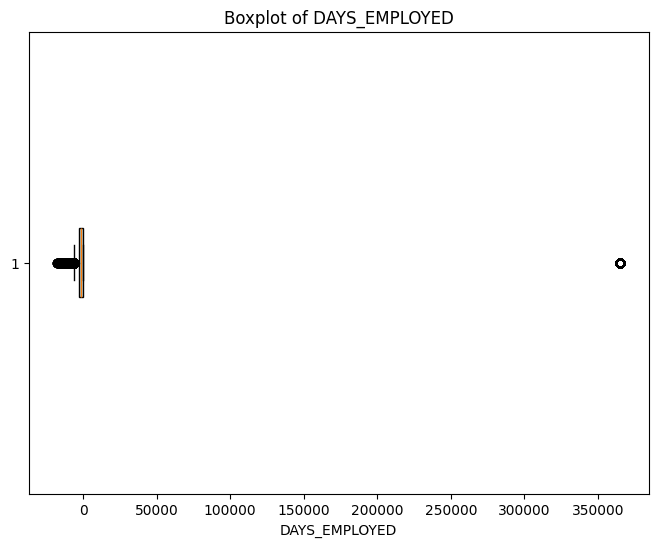

In [12]:

# DAYS_EMPLOYED 분포확인
print(df['DAYS_EMPLOYED'].describe())
plt.figure(figsize=(8, 6))
plt.boxplot(df['DAYS_EMPLOYED'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Boxplot of DAYS_EMPLOYED')
plt.xlabel('DAYS_EMPLOYED')
plt.show()

In [13]:
# 이상값 제외 분포 확인
anom = df[df['DAYS_EMPLOYED'] == 365243]
non_anom = df[df['DAYS_EMPLOYED'] != 365243]
non_anom['DAYS_EMPLOYED'].describe()

count   252137.00
mean     -2384.17
std       2338.36
min     -17912.00
25%      -3175.00
50%      -1648.00
75%       -767.00
max          0.00
Name: DAYS_EMPLOYED, dtype: float64

In [14]:
# 이상값을 전부 이상값 제외 평균값으로 대체
import numpy as np
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, -2476.74)

In [15]:
import matplotlib.pyplot as plt
# 음수 값 처리: 음수 값을 양수로 변환
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: x if x >= 0 else -x)

# 고용 기간을 개월 수로 변환
df_month = df.copy()
df_month['DAYS_EMPLOYED']= df['DAYS_EMPLOYED'] / 30
df_month['DAYS_EMPLOYED'].describe()


count   307511.00
mean        80.03
std         70.59
min          0.00
25%         31.10
50%         73.97
75%         92.00
max        597.07
Name: DAYS_EMPLOYED, dtype: float64

In [16]:
#변수 분포 및 도메인 지식에 기반한 전처리
distribution_columns = ['SK_ID_CURR', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT' ]
domain_columns = [col for col in df_month.columns if col.endswith('_MEDI') or col.endswith('_AVG') or col.endswith('_MODE')]
columns_to_drop = distribution_columns+domain_columns
df_droped=df_month.drop(columns=columns_to_drop)
df_droped

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,...,0,0,0,0,0,0,0,0,0.00,1.00
1,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,...,0,0,0,0,0,0,0,0,0.00,0.00
2,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,...,0,0,0,0,0,0,0,0,0.00,0.00
3,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,...,0,0,0,0,0,0,0,0,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,...,0,0,0,0,0,0,0,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.00,254700.00,27558.00,225000.00,...,0,0,0,0,0,0,0,0,NaN,NaN
307507,0,Cash loans,F,N,Y,0,72000.00,269550.00,12001.50,225000.00,...,0,0,0,0,0,0,0,0,NaN,NaN
307508,0,Cash loans,F,N,Y,0,153000.00,677664.00,29979.00,585000.00,...,0,0,0,0,0,0,0,0,1.00,1.00
307509,1,Cash loans,F,N,Y,0,171000.00,370107.00,20205.00,319500.00,...,0,0,0,0,0,0,0,0,0.00,0.00


### 각 데이터 유형 별 인코딩 혹은 변경

In [17]:
import pandas as pd

def encode_columns(df):
    """
    주어진 규칙에 따라 특정 열들을 인코딩하는 함수
    :param df: 데이터프레임
    :return: 인코딩된 데이터프레임
    """
    # 1. NAME_CONTRACT_TYPE: 대출 유형 (현금 또는 리볼빙)
    df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1})

    # 2. CODE_GENDER: 성별 (XNA 제거, 남성: 0, 여성: 1)
    df = df[df['CODE_GENDER'] != 'XNA'].copy()
    df['CODE_GENDER'] = df['CODE_GENDER'].map({'M': 0, 'F': 1})

    # 3. FLAG_OWN_CAR: 자동차 소유 여부 (Y: 1, N: 0)
    df.loc[:, 'FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})

    # 4. FLAG_OWN_REALTY: 주택 소유 여부 (Y: 1, N: 0)
    df.loc[:, 'FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

    # 5. NAME_TYPE_SUITE: 대출 신청 시 동행인 (Unaccompanied: 0, 나머지: 1)
    df.loc[:, 'NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].map({'Unaccompanied': 0}).fillna(1)

    # 6. NAME_INCOME_TYPE: 소득 유형
    income_map = {
        'Working': 0,
        'Commercial associate': 1,
        'Pensioner': 2,
        'State servant': 2
    }
    df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].map(income_map).fillna(3)

    # 7. NAME_EDUCATION_TYPE: 학력 수준 (순서형 인코딩 0~4)
    education_map = {
        'Lower secondary': 0,
        'Secondary / secondary special': 1,
        'Incomplete higher': 2,
        'Higher education': 3,
        'Academic degree': 4
    }
    df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map(education_map)

    # 8. NAME_FAMILY_STATUS: 가족 상태 (Married or Civil marriage → 1, Single → 2, Separated or Widow → 3)
    family_status_map = {
        'Married': 1, 'Civil marriage': 1,
        'Single / not married': 2,
        'Separated': 3, 'Widow': 3
    }
    df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].map(family_status_map)

    # 9. NAME_HOUSING_TYPE: 주거 형태 (House/apartment: 1, 나머지: 0)
    df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].map({
        'House / apartment': 1
    }).fillna(0)

    # 10. OCCUPATION_TYPE: 직업 유형 (Target Encoding)
    if 'OCCUPATION_TYPE' in df.columns and 'TARGET' in df.columns:
        occupation_target_map = df.groupby('OCCUPATION_TYPE')['TARGET'].mean()
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].map(occupation_target_map)

    # 11. ORGANIZATION_TYPE: 대출 신청자의 소속 조직 유형 (Frequency Encoding)
    if 'ORGANIZATION_TYPE' in df.columns:
        organization_type_map = df['ORGANIZATION_TYPE'].value_counts() / len(df)
        df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].map(organization_type_map)

    # 12. WEEKDAY_APPR_PROCESS_START: 평일(0), 주말(1)로 인코딩
    if 'WEEKDAY_APPR_PROCESS_START' in df.columns:
        weekend_days = {'SATURDAY', 'SUNDAY'}
        df['WEEKDAY_APPR_PROCESS_START'] = df['WEEKDAY_APPR_PROCESS_START'].apply(
            lambda x: 1 if x in weekend_days else 0
        )

    # NAME_INCOME_TYPE 및 NAME_FAMILY_STATUS를 원핫 인코딩
    df = pd.get_dummies(df, columns=['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS'], drop_first=True)
    
    #음수에 해당하는 값들을 전부 -1로 곱함
    minus_column = ['DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH']
    df[minus_column] = df[minus_column] * -1

    return df


# 데이터프레임 예시
df_edcoded = encode_columns(df_droped)
df_edcoded



,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_INCOME_TYPE_1.0,NAME_INCOME_TYPE_2.0,NAME_INCOME_TYPE_3.0,NAME_FAMILY_STATUS_2.0,NAME_FAMILY_STATUS_3.0
0,1,0,0,0,1,0,202500.00,406597.50,24700.50,351000.00,...,0,0,0,0.00,1.00,False,False,False,True,False
1,0,0,1,0,0,0,270000.00,1293502.50,35698.50,1129500.00,...,0,0,0,0.00,0.00,False,True,False,False,False
2,0,1,0,1,1,0,67500.00,135000.00,6750.00,135000.00,...,0,0,0,0.00,0.00,False,False,False,True,False
3,0,0,1,0,1,0,135000.00,312682.50,29686.50,297000.00,...,0,0,0,NaN,NaN,False,False,False,False,False
4,0,0,0,0,1,0,121500.00,513000.00,21865.50,513000.00,...,0,0,0,0.00,0.00,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,157500.00,254700.00,27558.00,225000.00,...,0,0,0,NaN,NaN,False,False,False,False,True
307507,0,0,1,0,1,0,72000.00,269550.00,12001.50,225000.00,...,0,0,0,NaN,NaN,False,True,False,False,True
307508,0,0,1,0,1,0,153000.00,677664.00,29979.00,585000.00,...,0,0,0,1.00,1.00,False,False,False,False,True
307509,1,0,1,0,1,0,171000.00,370107.00,20205.00,319500.00,...,0,0,0,0.00,0.00,True,False,False,False,False


In [18]:
# 변환할 열 목록 # train
columns_to_convert = [
    'NAME_INCOME_TYPE_1.0',
    'NAME_INCOME_TYPE_2.0',
    'NAME_INCOME_TYPE_3.0',
    'NAME_FAMILY_STATUS_2.0',
    'NAME_FAMILY_STATUS_3.0'
]
for column in df_edcoded:
        if column in df_edcoded.columns:
            df_edcoded[column] = df_edcoded[column].apply(lambda x: int(x) if pd.notnull(x) and isinstance(x, bool) else x)  # True -> 1, False -> 0, 결측치는 유지
        else:
            print(f"Warning: Column '{column}' not found in the dataframe.")
df_train = df_edcoded



In [ ]:
df_train 


## 결측치를 중앙값으로 대체

In [19]:
import pandas as pd
# 1. 클래스별 중앙값 계산
def calculate_class_medians(df, target_col):
    class_medians = {}
    for cls in df[target_col].unique():  # 각 클래스별 중앙값 계산
        class_data = df[df[target_col] == cls]
        class_medians[cls] = class_data.median()
    return class_medians

# 2. 훈련 데이터와 같은 중앙값으로 테스트 데이터 결측치 처리
def impute_test_data(test_df, class_medians):
    imputed_df = test_df.copy()
    for col in class_medians[0].index:  # 클래스 0의 중앙값을 기준으로 반복
        if col in test_df.columns:
            imputed_df[col] = test_df[col].fillna(class_medians[0][col])
    return imputed_df

# 사용 예시
# 훈련 데이터에서 클래스별 중앙값 계산
class_medians = calculate_class_medians(df_train, target_col='TARGET')



In [20]:
import pandas as pd

# 예제 데이터프레임
# df = pd.read_csv('your_data.csv')

# 각 클래스별로 결측치를 중앙값으로 대체
def impute_by_class(df, target_col):
    imputed_df = pd.DataFrame()
    for cls in df[target_col].unique():  # 각 클래스에 대해
        class_data = df[df[target_col] == cls]
        class_data = class_data.fillna(class_data.median())  # 중앙값으로 결측치 대체
        imputed_df = pd.concat([imputed_df, class_data], axis=0)
    return imputed_df

# 결측치 처리
df_imputed = impute_by_class(df_edcoded, target_col='TARGET')


In [21]:
df_imputed.isnull().sum().sum()

0

In [23]:
from sklearn.preprocessing import StandardScaler, RobustScaler
import pandas as pd

def automatic_scaling_with_skewness_kurtosis(df, binary_threshold=2, alpha=0.05):
    scaled_columns = {}
    scalers = {}
    scaling_counts = {"StandardScaler": 0, "RobustScaler": 0, "Skipped (Binary)": 0}
    
    for col in df.select_dtypes(include=["float", "int"]).columns:
        unique_values = df[col].dropna().unique()
        
        # 바이너리 데이터 제외
        if len(unique_values) <= binary_threshold:
            print(f"열: {col}, 고유값: {unique_values}, 스케일링 제외 (바이너리 데이터)")
            scaling_counts["Skipped (Binary)"] += 1
            scaled_columns[col] = df[col]  # 그대로 추가
            continue
        
        # 왜도와 첨도 계산
        skewness = df[col].dropna().skew()
        kurtosis = df[col].dropna().kurtosis()
        
        # 스케일링 방법 선택
        if abs(skewness) < 0.5 and abs(kurtosis) < 3:
            scaler = StandardScaler()
            scaling_method = 'StandardScaler'
        else:
            scaler = RobustScaler()
            scaling_method = 'RobustScaler'
        
        # 스케일러를 적용하여 데이터 변환
        scaled_values = scaler.fit_transform(df[[col]])
        
        # 스케일러 저장 및 카운트 증가
        scalers[col] = scaler
        scaling_counts[scaling_method] += 1
        
        # 변환된 값을 저장
        scaled_columns[col] = scaled_values.flatten()
        
        print(f"열: {col}, 왜도: {skewness:.2f}, 첨도: {kurtosis:.2f}, 스케일링 방법: {scaling_method}")
    
    # DataFrame 생성: 모든 열을 한 번에 병합
    scaled_df = pd.DataFrame(scaled_columns)
    return scaled_df, scalers, scaling_counts

scaled_df, scalers, scaling_counts = automatic_scaling_with_skewness_kurtosis(df_imputed)
scaling_counts


열: TARGET, 고유값: [1 0], 스케일링 제외 (바이너리 데이터)
열: NAME_CONTRACT_TYPE, 고유값: [0 1], 스케일링 제외 (바이너리 데이터)
열: CODE_GENDER, 고유값: [0 1], 스케일링 제외 (바이너리 데이터)
열: FLAG_OWN_CAR, 고유값: [0 1], 스케일링 제외 (바이너리 데이터)
열: FLAG_OWN_REALTY, 고유값: [1 0], 스케일링 제외 (바이너리 데이터)
열: CNT_CHILDREN, 왜도: 1.97, 첨도: 7.90, 스케일링 방법: RobustScaler
열: AMT_INCOME_TOTAL, 왜도: 391.56, 첨도: 191784.26, 스케일링 방법: RobustScaler
열: AMT_CREDIT, 왜도: 1.23, 첨도: 1.93, 스케일링 방법: RobustScaler
열: AMT_ANNUITY, 왜도: 1.58, 첨도: 7.71, 스케일링 방법: RobustScaler
열: AMT_GOODS_PRICE, 왜도: 1.35, 첨도: 2.44, 스케일링 방법: RobustScaler
열: NAME_TYPE_SUITE, 고유값: [0. 1.], 스케일링 제외 (바이너리 데이터)
열: NAME_EDUCATION_TYPE, 왜도: 1.02, 첨도: -0.72, 스케일링 방법: RobustScaler
열: NAME_HOUSING_TYPE, 고유값: [1. 0.], 스케일링 제외 (바이너리 데이터)
열: REGION_POPULATION_RELATIVE, 왜도: 1.49, 첨도: 3.26, 스케일링 방법: RobustScaler
열: DAYS_BIRTH, 왜도: -0.12, 첨도: -1.05, 스케일링 방법: StandardScaler
열: DAYS_EMPLOYED, 왜도: 2.15, 첨도: 6.38, 스케일링 방법: RobustScaler
열: DAYS_REGISTRATION, 왜도: 0.59, 첨도: -0.32, 스케일링 방법: RobustScaler
열: DAYS_ID_PUBLISH

{'StandardScaler': 8, 'RobustScaler': 20, 'Skipped (Binary)': 43}

In [40]:
scaled_df.to_csv(r"C:\Users\Administrator\Desktop\df_final_raw_test.csv", index = False)
#test셋도 전처리하기 위해 코드 수정됨

## VIF 확인

In [24]:
df_final_raw = pd.read_csv(r"C:\Users\Administrator\Desktop\final_raw.csv")
df_final_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307507 entries, 0 to 307506
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307507 non-null  int64  
 1   NAME_CONTRACT_TYPE           307507 non-null  int64  
 2   CODE_GENDER                  307507 non-null  int64  
 3   FLAG_OWN_CAR                 307507 non-null  int64  
 4   FLAG_OWN_REALTY              307507 non-null  int64  
 5   CNT_CHILDREN                 307507 non-null  float64
 6   AMT_INCOME_TOTAL             307507 non-null  float64
 7   AMT_CREDIT                   307507 non-null  float64
 8   AMT_ANNUITY                  307507 non-null  float64
 9   AMT_GOODS_PRICE              307507 non-null  float64
 10  NAME_TYPE_SUITE              307507 non-null  float64
 11  NAME_EDUCATION_TYPE          307507 non-null  float64
 12  NAME_HOUSING_TYPE            307507 non-null  float64
 13 

### VIF 1차 진행

In [22]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def check_vif_live(df, thresh=100):
    """
    VIF 값을 계산하고 한 번 계산할 때마다 출력하는 함수.
    Parameters:
        - df (pd.DataFrame): VIF 계산 대상 데이터프레임
        - thresh (float): VIF 임계값 (기본값: 8)
    Returns:
        - pd.DataFrame: VIF가 임계값을 초과하는 변수들 및 VIF 값
    """
    vif_df = pd.DataFrame(columns=["Feature", "VIF"])
    
    print("VIF 계산 시작...\n")
    
    # VIF 계산
    for i in range(df.shape[1]):
        feature_name = df.columns[i]
        vif_value = variance_inflation_factor(df.values, i)
        vif_df = pd.concat([vif_df, pd.DataFrame({"Feature": [feature_name], "VIF": [vif_value]})], ignore_index=True)
        
        # 계산한 VIF 바로 출력
        print(f"Feature: {feature_name}, VIF: {vif_value:.2f}")
    
    # VIF가 임계값을 초과하는 변수 필터링
    high_vif = vif_df[vif_df["VIF"] > thresh]
    
    print("\nVIF 값이 임계값을 초과하는 변수들:")
    print(high_vif)

    return high_vif

# 예제: scaled_df에 VIF 확인
high_vif_features = check_vif_live(df_final_raw.drop(columns = "TARGET"))

# VIF가 높은 변수 리스트 출력
print("\nVIF가 높은 변수들 리스트:")
print(high_vif_features["Feature"].tolist())


VIF 계산 시작...



C:\Users\Administrator\AppData\Local\Temp\ipykernel_3164\4006110209.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  vif_df = pd.concat([vif_df, pd.DataFrame({"Feature": [feature_name], "VIF": [vif_value]})], ignore_index=True)


Feature: NAME_CONTRACT_TYPE, VIF: 3.32
Feature: CODE_GENDER, VIF: 3.88
Feature: FLAG_OWN_CAR, VIF: 1.93
Feature: FLAG_OWN_REALTY, VIF: 3.67


c:\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Feature: CNT_CHILDREN, VIF: inf
Feature: AMT_INCOME_TOTAL, VIF: 1.07
Feature: AMT_CREDIT, VIF: 44.01
Feature: AMT_ANNUITY, VIF: 2.84
Feature: AMT_GOODS_PRICE, VIF: 45.54
Feature: NAME_TYPE_SUITE, VIF: 1.27
Feature: NAME_EDUCATION_TYPE, VIF: 1.64
Feature: NAME_HOUSING_TYPE, VIF: 9.19
Feature: REGION_POPULATION_RELATIVE, VIF: 1.48
Feature: DAYS_BIRTH, VIF: 2.55
Feature: DAYS_EMPLOYED, VIF: 1.32
Feature: DAYS_REGISTRATION, VIF: 1.19
Feature: DAYS_ID_PUBLISH, VIF: 1.15
Feature: OWN_CAR_AGE, VIF: 1.09
Feature: FLAG_EMP_PHONE, VIF: 20.76
Feature: FLAG_WORK_PHONE, VIF: 1.57
Feature: FLAG_PHONE, VIF: 1.60
Feature: FLAG_EMAIL, VIF: 1.10
Feature: OCCUPATION_TYPE, VIF: 1.29
Feature: CNT_FAM_MEMBERS, VIF: inf
Feature: REGION_RATING_CLIENT, VIF: 10.83
Feature: REGION_RATING_CLIENT_W_CITY, VIF: 10.67
Feature: WEEKDAY_APPR_PROCESS_START, VIF: 1.21
Feature: HOUR_APPR_PROCESS_START, VIF: 1.14
Feature: REG_REGION_NOT_LIVE_REGION, VIF: 2.47
Feature: REG_REGION_NOT_WORK_REGION, VIF: 9.55
Feature: LIVE_REG

### VIF지수가 높은 변수들 분포, 상관성 확인

In [32]:
high_vif_features

,Feature,VIF
4,CNT_CHILDREN,inf
23,CNT_FAM_MEMBERS,inf
38,OBS_30_CNT_SOCIAL_CIRCLE,448.26
40,OBS_60_CNT_SOCIAL_CIRCLE,448.25
68,NAME_FAMILY_STATUS_2.0,inf
69,NAME_FAMILY_STATUS_3.0,inf


In [ ]:
# 확인하려는 피처 목록
features_to_plot = [
    "CNT_CHILDREN",
    "CNT_FAM_MEMBERS",
    "OBS_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE",
    "NAME_FAMILY_STATUS_2.0",
    "NAME_FAMILY_STATUS_3.0"
]

# 각 피처의 분포를 히스토그램으로 시각화

for feature in features_to_plot:
    if feature in df_final_raw.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df_final_raw[feature], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Feature '{feature}' not found in df_final_raw.")



In [ ]:
#'CNT_CHILDREN'과 다른 변수들의 상관계수 계산
correlation_with_children = df_final_raw.corr()['DEF_30_CNT_SOCIAL_CIRCLE '].sort_values(ascending=False)
correlation_with_children



CNT_FAM_MEMBERS           1.00
CNT_CHILDREN              0.88
DAYS_BIRTH                0.28
FLAG_EMP_PHONE            0.23
FLAG_OWN_CAR              0.15
                          ... 
FLAG_DOCUMENT_6          -0.16
DAYS_REGISTRATION        -0.17
NAME_INCOME_TYPE_2.0     -0.18
NAME_FAMILY_STATUS_3.0   -0.36
NAME_FAMILY_STATUS_2.0   -0.45
Name: CNT_FAM_MEMBERS, Length: 71, dtype: float64

CNT_FAM_MEMBERS와 CNT_CHILDREN가 상관성이 매우 높게 나오고 둘 다 VIF지수가 INF로 FAM_MEMBERS삭제
OBS_30과 OBS_60이 강한 상관성을 가지고 VIF지수가 매우 높기 때문에 OBS_30을 삭제
같은 이유로 DFS_30과 DFS_60도 매우 상관이 있기 때문에 VIF가 높진 않지만 DEF_30도 삭제
Feature: NAME_INCOME_TYPE_1.0, VIF: 1.56
Feature: NAME_INCOME_TYPE_2.0, VIF: 3.58
Feature: NAME_INCOME_TYPE_3.0, VIF: 1.00
Feature: NAME_FAMILY_STATUS_2.0, VIF: inf
Feature: NAME_FAMILY_STATUS_3.0, VIF: inf
위 feature들은 one-hot encoding한 변수이므로 제외하고 VIF지수를 진행

In [25]:
VIF_1_drop = ['CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE' ]
df_VIF_1_drop = df_final_raw.drop(columns = VIF_1_drop)
df_VIF_1_drop

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_INCOME_TYPE_1.0,NAME_INCOME_TYPE_2.0,NAME_INCOME_TYPE_3.0,NAME_FAMILY_STATUS_2.0,NAME_FAMILY_STATUS_3.0
0,1,0,0,0,1,0.00,0.61,-0.20,-0.01,-0.22,...,0,0,0,0.00,0.00,0,0,0,1,0
1,1,0,1,0,1,0.00,-0.39,0.87,0.12,0.57,...,0,0,0,0.00,0.50,0,0,0,0,1
2,1,0,0,0,1,0.00,0.61,1.26,0.56,0.92,...,0,0,0,0.00,1.50,1,0,0,0,0
3,1,0,1,0,0,0.00,-0.14,-0.42,-0.48,-0.48,...,0,0,0,0.00,0.50,0,0,0,0,0
4,1,0,1,0,1,0.00,-0.73,-0.49,-0.57,-0.45,...,0,0,0,0.00,-0.50,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0,0,1,0,1,0.00,-0.39,-0.54,-0.16,-0.51,...,0,0,0,0.00,-0.50,0,1,0,1,0
307503,0,0,0,0,0,0.00,0.12,-0.48,0.15,-0.51,...,0,0,0,0.00,0.00,0,0,0,0,1
307504,0,0,1,0,1,0.00,-0.83,-0.45,-0.71,-0.51,...,0,0,0,0.00,0.00,0,1,0,0,1
307505,0,0,1,0,1,0.00,0.07,0.30,0.28,0.31,...,0,0,0,1.00,0.00,0,0,0,0,1


### VIF 2차 진행

In [35]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def check_vif_live(df, thresh=10):
    """
    VIF 값을 계산하고 한 번 계산할 때마다 출력하는 함수.
    Parameters:
        - df (pd.DataFrame): VIF 계산 대상 데이터프레임
        - thresh (float): VIF 임계값 (기본값: 8)
    Returns:
        - pd.DataFrame: VIF가 임계값을 초과하는 변수들 및 VIF 값
    """
    vif_df = pd.DataFrame(columns=["Feature", "VIF"])
    
    print("VIF 계산 시작...\n")
    
    # VIF 계산
    for i in range(df.shape[1]):
        feature_name = df.columns[i]
        vif_value = variance_inflation_factor(df.values, i)
        vif_df = pd.concat([vif_df, pd.DataFrame({"Feature": [feature_name], "VIF": [vif_value]})], ignore_index=True)
        
        # 계산한 VIF 바로 출력
        print(f"Feature: {feature_name}, VIF: {vif_value:.2f}")
    
    # VIF가 임계값을 초과하는 변수 필터링
    high_vif = vif_df[vif_df["VIF"] > thresh]
    
    print("\nVIF 값이 임계값을 초과하는 변수들:")
    print(high_vif)

    return high_vif

# 예제: scaled_df에 VIF 확인
exclude = ['TARGET', 'NAME_INCOME_TYPE_1.0', 'NAME_INCOME_TYPE_2.0', 'NAME_INCOME_TYPE_3.0','NAME_FAMILY_STATUS_2.0', 'NAME_FAMILY_STATUS_3.0']
high_vif_features_2 = check_vif_live(df_VIF_1_drop.drop(columns = exclude))

# VIF가 높은 변수 리스트 출력
print("\nVIF가 높은 변수들 리스트:")
print(high_vif_features_2["Feature"].tolist())


VIF 계산 시작...



C:\Users\Administrator\AppData\Local\Temp\ipykernel_3164\3189503820.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  vif_df = pd.concat([vif_df, pd.DataFrame({"Feature": [feature_name], "VIF": [vif_value]})], ignore_index=True)


Feature: NAME_CONTRACT_TYPE, VIF: 2.72
Feature: CODE_GENDER, VIF: 3.79
Feature: FLAG_OWN_CAR, VIF: 1.91
Feature: FLAG_OWN_REALTY, VIF: 3.66
Feature: CNT_CHILDREN, VIF: 1.57
Feature: AMT_INCOME_TOTAL, VIF: 1.07
Feature: AMT_CREDIT, VIF: 44.00
Feature: AMT_ANNUITY, VIF: 2.83
Feature: AMT_GOODS_PRICE, VIF: 45.51
Feature: NAME_TYPE_SUITE, VIF: 1.26
Feature: NAME_EDUCATION_TYPE, VIF: 1.62
Feature: NAME_HOUSING_TYPE, VIF: 9.08
Feature: REGION_POPULATION_RELATIVE, VIF: 1.47
Feature: DAYS_BIRTH, VIF: 2.46
Feature: DAYS_EMPLOYED, VIF: 1.31
Feature: DAYS_REGISTRATION, VIF: 1.18
Feature: DAYS_ID_PUBLISH, VIF: 1.15
Feature: OWN_CAR_AGE, VIF: 1.09
Feature: FLAG_EMP_PHONE, VIF: 13.01
Feature: FLAG_WORK_PHONE, VIF: 1.56
Feature: FLAG_PHONE, VIF: 1.60
Feature: FLAG_EMAIL, VIF: 1.09
Feature: OCCUPATION_TYPE, VIF: 1.28
Feature: REGION_RATING_CLIENT, VIF: 10.80
Feature: REGION_RATING_CLIENT_W_CITY, VIF: 10.66
Feature: WEEKDAY_APPR_PROCESS_START, VIF: 1.20
Feature: HOUR_APPR_PROCESS_START, VIF: 1.14
Featu

In [36]:
high_vif_features_2

,Feature,VIF
6,AMT_CREDIT,44.00
8,AMT_GOODS_PRICE,45.51
18,FLAG_EMP_PHONE,13.01
23,REGION_RATING_CLIENT,10.80
24,REGION_RATING_CLIENT_W_CITY,10.66
41,FLAG_DOCUMENT_3,14.65


In [41]:
correlation_with_children = df_VIF_1_drop.corr()['FLAG_EMP_PHONE'].sort_values(ascending=False)
correlation_with_children

FLAG_EMP_PHONE            1.00
DAYS_BIRTH                0.62
NAME_INCOME_TYPE_1.0      0.26
REG_CITY_NOT_WORK_CITY    0.26
FLAG_DOCUMENT_3           0.25
                          ... 
DAYS_REGISTRATION        -0.21
DAYS_ID_PUBLISH          -0.27
ORGANIZATION_TYPE        -0.40
FLAG_DOCUMENT_6          -0.60
NAME_INCOME_TYPE_2.0     -0.81
Name: FLAG_EMP_PHONE, Length: 68, dtype: float64

AMT_CREDIT와 AMT_GOODS_PRICE는 높은 상관성을 가짐. CREDIT은 실제 빌린 금액, GOODS_price는 빌리는 대출 제품의 금액이다. 따라서 AMT_GOODS_PRICE는 제거.
FLAG_EMP_PHONE은 VIF지수가 높게 나오고 DOCUMENT_3와도 연관성을 지닌다. 또한 DAYS_BIRTH하고도 연관성을 많이 가져서 제거.
REGION_RATING_CLIENT과 REGION_RATING_CLIENT_W_CITY은 두 변수간의 상관성 지수가 0.95로 굉장히 높기 때문에 지역을 고려한 REGION_RATING_CLIENT_W_CITY은 남기고
REGION_RATING_CLIENT은 제거하고 진행행

In [42]:
VIF_2_drop = ['AMT_GOODS_PRICE', 'FLAG_EMP_PHONE','REGION_RATING_CLIENT']
df_VIF_2_drop = df_VIF_1_drop.drop(columns = VIF_2_drop)
df_VIF_2_drop

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_INCOME_TYPE_1.0,NAME_INCOME_TYPE_2.0,NAME_INCOME_TYPE_3.0,NAME_FAMILY_STATUS_2.0,NAME_FAMILY_STATUS_3.0
0,1,0,0,0,1,0.00,0.61,-0.20,-0.01,0.00,...,0,0,0,0.00,0.00,0,0,0,1,0
1,1,0,1,0,1,0.00,-0.39,0.87,0.12,0.00,...,0,0,0,0.00,0.50,0,0,0,0,1
2,1,0,0,0,1,0.00,0.61,1.26,0.56,0.00,...,0,0,0,0.00,1.50,1,0,0,0,0
3,1,0,1,0,0,0.00,-0.14,-0.42,-0.48,0.00,...,0,0,0,0.00,0.50,0,0,0,0,0
4,1,0,1,0,1,0.00,-0.73,-0.49,-0.57,0.00,...,0,0,0,0.00,-0.50,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0,0,1,0,1,0.00,-0.39,-0.54,-0.16,0.00,...,0,0,0,0.00,-0.50,0,1,0,1,0
307503,0,0,0,0,0,0.00,0.12,-0.48,0.15,0.00,...,0,0,0,0.00,0.00,0,0,0,0,1
307504,0,0,1,0,1,0.00,-0.83,-0.45,-0.71,0.00,...,0,0,0,0.00,0.00,0,1,0,0,1
307505,0,0,1,0,1,0.00,0.07,0.30,0.28,0.00,...,0,0,0,1.00,0.00,0,0,0,0,1


### VIF 3차 진행

In [44]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def check_vif_live(df, thresh=8):
    """
    VIF 값을 계산하고 한 번 계산할 때마다 출력하는 함수.
    Parameters:
        - df (pd.DataFrame): VIF 계산 대상 데이터프레임
        - thresh (float): VIF 임계값 (기본값: 8)
    Returns:
        - pd.DataFrame: VIF가 임계값을 초과하는 변수들 및 VIF 값
    """
    vif_df = pd.DataFrame(columns=["Feature", "VIF"])
    
    print("VIF 계산 시작...\n")
    
    # VIF 계산
    for i in range(df.shape[1]):
        feature_name = df.columns[i]
        vif_value = variance_inflation_factor(df.values, i)
        vif_df = pd.concat([vif_df, pd.DataFrame({"Feature": [feature_name], "VIF": [vif_value]})], ignore_index=True)
        
        # 계산한 VIF 바로 출력
        print(f"Feature: {feature_name}, VIF: {vif_value:.2f}")
    
    # VIF가 임계값을 초과하는 변수 필터링
    high_vif = vif_df[vif_df["VIF"] > thresh]
    
    print("\nVIF 값이 임계값을 초과하는 변수들:")
    print(high_vif)

    return high_vif

# 예제: scaled_df에 VIF 확인
exclude = ['TARGET', 'NAME_INCOME_TYPE_1.0', 'NAME_INCOME_TYPE_2.0', 'NAME_INCOME_TYPE_3.0','NAME_FAMILY_STATUS_2.0', 'NAME_FAMILY_STATUS_3.0']
high_vif_features_3 = check_vif_live(df_VIF_2_drop.drop(columns = exclude))

# VIF가 높은 변수 리스트 출력
print("\nVIF가 높은 변수들 리스트:")
print(high_vif_features_3["Feature"].tolist())

VIF 계산 시작...



C:\Users\Administrator\AppData\Local\Temp\ipykernel_3164\4076058068.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  vif_df = pd.concat([vif_df, pd.DataFrame({"Feature": [feature_name], "VIF": [vif_value]})], ignore_index=True)


Feature: NAME_CONTRACT_TYPE, VIF: 2.12
Feature: CODE_GENDER, VIF: 3.79
Feature: FLAG_OWN_CAR, VIF: 1.90
Feature: FLAG_OWN_REALTY, VIF: 3.64
Feature: CNT_CHILDREN, VIF: 1.56
Feature: AMT_INCOME_TOTAL, VIF: 1.07
Feature: AMT_CREDIT, VIF: 2.72
Feature: AMT_ANNUITY, VIF: 2.74
Feature: NAME_TYPE_SUITE, VIF: 1.26
Feature: NAME_EDUCATION_TYPE, VIF: 1.61
Feature: NAME_HOUSING_TYPE, VIF: 8.92
Feature: REGION_POPULATION_RELATIVE, VIF: 1.46
Feature: DAYS_BIRTH, VIF: 2.00
Feature: DAYS_EMPLOYED, VIF: 1.26
Feature: DAYS_REGISTRATION, VIF: 1.18
Feature: DAYS_ID_PUBLISH, VIF: 1.13
Feature: OWN_CAR_AGE, VIF: 1.09
Feature: FLAG_WORK_PHONE, VIF: 1.50
Feature: FLAG_PHONE, VIF: 1.59
Feature: FLAG_EMAIL, VIF: 1.09
Feature: OCCUPATION_TYPE, VIF: 1.28
Feature: REGION_RATING_CLIENT_W_CITY, VIF: 1.57
Feature: WEEKDAY_APPR_PROCESS_START, VIF: 1.20
Feature: HOUR_APPR_PROCESS_START, VIF: 1.13
Feature: REG_REGION_NOT_LIVE_REGION, VIF: 2.47
Feature: REG_REGION_NOT_WORK_REGION, VIF: 9.55
Feature: LIVE_REGION_NOT_WOR

In [45]:
high_vif_features_3

,Feature,VIF
10,NAME_HOUSING_TYPE,8.92
25,REG_REGION_NOT_WORK_REGION,9.55
28,REG_CITY_NOT_WORK_CITY,9.72
38,FLAG_DOCUMENT_3,9.96


In [50]:
correlation = df_VIF_2_drop.corr()['FLAG_DOCUMENT_3'].sort_values(ascending=False)
correlation

FLAG_DOCUMENT_3         1.00
DAYS_BIRTH              0.11
AMT_ANNUITY             0.10
AMT_CREDIT              0.10
CODE_GENDER             0.09
                        ... 
NAME_INCOME_TYPE_2.0   -0.19
FLAG_DOCUMENT_5        -0.19
FLAG_DOCUMENT_8        -0.47
NAME_CONTRACT_TYPE     -0.48
FLAG_DOCUMENT_6        -0.49
Name: FLAG_DOCUMENT_3, Length: 65, dtype: float64

REG_REGION_NOT_WORK_REGION과 REG_CITY_NOT_WORK_CITY는 각각 LIVE_REGION과 LIVE_CITY과 강한 상관관계를 가지고 실제로 의미가 유사하다. 
(등록 거주지와 실 거주지의 차이) 따라서 이 두 변수를 제거하고 다시 보도록 한다. 
NAME_HOUSING_TYPE과 FLAG_DOCUMENT_3는 VIF가 높게 나오지만, 확실한 대체제가 애매하고 DOCUMENT의 경우 너무 총 21개의 변수로 구성되어 우선 두기로 하였다.

In [51]:
VIF_3_drop = ['REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY']
df_VIF_3_drop = df_VIF_2_drop.drop(columns = VIF_3_drop)
df_VIF_3_drop

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_INCOME_TYPE_1.0,NAME_INCOME_TYPE_2.0,NAME_INCOME_TYPE_3.0,NAME_FAMILY_STATUS_2.0,NAME_FAMILY_STATUS_3.0
0,1,0,0,0,1,0.00,0.61,-0.20,-0.01,0.00,...,0,0,0,0.00,0.00,0,0,0,1,0
1,1,0,1,0,1,0.00,-0.39,0.87,0.12,0.00,...,0,0,0,0.00,0.50,0,0,0,0,1
2,1,0,0,0,1,0.00,0.61,1.26,0.56,0.00,...,0,0,0,0.00,1.50,1,0,0,0,0
3,1,0,1,0,0,0.00,-0.14,-0.42,-0.48,0.00,...,0,0,0,0.00,0.50,0,0,0,0,0
4,1,0,1,0,1,0.00,-0.73,-0.49,-0.57,0.00,...,0,0,0,0.00,-0.50,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0,0,1,0,1,0.00,-0.39,-0.54,-0.16,0.00,...,0,0,0,0.00,-0.50,0,1,0,1,0
307503,0,0,0,0,0,0.00,0.12,-0.48,0.15,0.00,...,0,0,0,0.00,0.00,0,0,0,0,1
307504,0,0,1,0,1,0.00,-0.83,-0.45,-0.71,0.00,...,0,0,0,0.00,0.00,0,1,0,0,1
307505,0,0,1,0,1,0.00,0.07,0.30,0.28,0.00,...,0,0,0,1.00,0.00,0,0,0,0,1


### VIF 4차 진행

In [52]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def check_vif_live(df, thresh=8):
    """
    VIF 값을 계산하고 한 번 계산할 때마다 출력하는 함수.
    Parameters:
        - df (pd.DataFrame): VIF 계산 대상 데이터프레임
        - thresh (float): VIF 임계값 (기본값: 8)
    Returns:
        - pd.DataFrame: VIF가 임계값을 초과하는 변수들 및 VIF 값
    """
    vif_df = pd.DataFrame(columns=["Feature", "VIF"])
    
    print("VIF 계산 시작...\n")
    
    # VIF 계산
    for i in range(df.shape[1]):
        feature_name = df.columns[i]
        vif_value = variance_inflation_factor(df.values, i)
        vif_df = pd.concat([vif_df, pd.DataFrame({"Feature": [feature_name], "VIF": [vif_value]})], ignore_index=True)
        
        # 계산한 VIF 바로 출력
        print(f"Feature: {feature_name}, VIF: {vif_value:.2f}")
    
    # VIF가 임계값을 초과하는 변수 필터링
    high_vif = vif_df[vif_df["VIF"] > thresh]
    
    print("\nVIF 값이 임계값을 초과하는 변수들:")
    print(high_vif)

    return high_vif

# 예제: scaled_df에 VIF 확인
exclude = ['TARGET', 'NAME_INCOME_TYPE_1.0', 'NAME_INCOME_TYPE_2.0', 'NAME_INCOME_TYPE_3.0','NAME_FAMILY_STATUS_2.0', 'NAME_FAMILY_STATUS_3.0']
high_vif_features_4 = check_vif_live(df_VIF_3_drop.drop(columns = exclude))

# VIF가 높은 변수 리스트 출력
print("\nVIF가 높은 변수들 리스트:")
print(high_vif_features_4["Feature"].tolist())

VIF 계산 시작...



C:\Users\Administrator\AppData\Local\Temp\ipykernel_3164\2544277874.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  vif_df = pd.concat([vif_df, pd.DataFrame({"Feature": [feature_name], "VIF": [vif_value]})], ignore_index=True)


Feature: NAME_CONTRACT_TYPE, VIF: 2.12
Feature: CODE_GENDER, VIF: 3.79
Feature: FLAG_OWN_CAR, VIF: 1.90
Feature: FLAG_OWN_REALTY, VIF: 3.64
Feature: CNT_CHILDREN, VIF: 1.56
Feature: AMT_INCOME_TOTAL, VIF: 1.07
Feature: AMT_CREDIT, VIF: 2.72
Feature: AMT_ANNUITY, VIF: 2.74
Feature: NAME_TYPE_SUITE, VIF: 1.26
Feature: NAME_EDUCATION_TYPE, VIF: 1.61
Feature: NAME_HOUSING_TYPE, VIF: 8.91
Feature: REGION_POPULATION_RELATIVE, VIF: 1.45
Feature: DAYS_BIRTH, VIF: 2.00
Feature: DAYS_EMPLOYED, VIF: 1.25
Feature: DAYS_REGISTRATION, VIF: 1.18
Feature: DAYS_ID_PUBLISH, VIF: 1.13
Feature: OWN_CAR_AGE, VIF: 1.09
Feature: FLAG_WORK_PHONE, VIF: 1.50
Feature: FLAG_PHONE, VIF: 1.59
Feature: FLAG_EMAIL, VIF: 1.09
Feature: OCCUPATION_TYPE, VIF: 1.28
Feature: REGION_RATING_CLIENT_W_CITY, VIF: 1.57
Feature: WEEKDAY_APPR_PROCESS_START, VIF: 1.20
Feature: HOUR_APPR_PROCESS_START, VIF: 1.13
Feature: REG_REGION_NOT_LIVE_REGION, VIF: 1.18
Feature: LIVE_REGION_NOT_WORK_REGION, VIF: 1.15
Feature: REG_CITY_NOT_LIVE_

In [53]:
high_vif_features_4

,Feature,VIF
10,NAME_HOUSING_TYPE,8.91
36,FLAG_DOCUMENT_3,9.93


결론적으로 cycle3에서 냅뒀던 두 변수의 VIF지수가 높게 나오고 나머지에 대해선 VIF지수가 4이하의 값을 가지게 되었다. 
이 두 변수의 경우 변수의 정확한 관계성을 알 수 없고, 대체할 수 있는 변수가 명확하지 않아 우선 포함하고, 변수 선택 시 제거될 수 있도록 한다. 

In [56]:
df_VIF_3_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307507 entries, 0 to 307506
Data columns (total 63 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307507 non-null  int64  
 1   NAME_CONTRACT_TYPE           307507 non-null  int64  
 2   CODE_GENDER                  307507 non-null  int64  
 3   FLAG_OWN_CAR                 307507 non-null  int64  
 4   FLAG_OWN_REALTY              307507 non-null  int64  
 5   CNT_CHILDREN                 307507 non-null  float64
 6   AMT_INCOME_TOTAL             307507 non-null  float64
 7   AMT_CREDIT                   307507 non-null  float64
 8   AMT_ANNUITY                  307507 non-null  float64
 9   NAME_TYPE_SUITE              307507 non-null  float64
 10  NAME_EDUCATION_TYPE          307507 non-null  float64
 11  NAME_HOUSING_TYPE            307507 non-null  float64
 12  REGION_POPULATION_RELATIVE   307507 non-null  float64
 13 